In [1]:
import tensorflow as tf

2024-08-04 11:07:54.747528: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-04 11:07:54.747635: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-04 11:07:54.872669: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
import os
from keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Exploratory Data Analysis**

In [3]:
def get_path(plant_dir:str, dir_test:str):
    
    if dir_test == 'Test':
        return '/kaggle/input/plant-village-dataset-updated/' + plant_dir + '/Test'

    elif dir_test == 'Train':
        return '/kaggle/input/plant-village-dataset-updated/' + plant_dir + '/Train'
        
    elif dir_test == 'Val':
        return '/kaggle/input/plant-village-dataset-updated/' + plant_dir + '/Val'

In [4]:
# No. of Directories containing images (data) for training, testing & validation 
plant_dirs = list(os.listdir('/kaggle/input/plant-village-dataset-updated'))
plant_dirs

['Tomato',
 'Apple',
 'Bell Pepper',
 'Strawberry',
 'Corn (Maize)',
 'Peach',
 'Grape',
 'Cherry',
 'Potato']

In [5]:
# Image dimensionality and batch size
image_dim = (256, 256)
batch_size = 32
num_channels = 3
input_shape = (batch_size, image_dim[0], image_dim[1], num_channels)   # (32, 256, 256, 3)

**Training Dataset**

In [6]:
train_dataset = {}
print('================ Images & Classes for Training ================\n')
for plant in plant_dirs:
    print('>>> No. of Images & Classes in "{}" directory'.format(plant))
    train_dataset[plant] = image_dataset_from_directory(get_path(plant, 'Train'),
                                                        shuffle = True,
                                                        labels = 'inferred',
                                                        label_mode = 'int',
                                                        image_size = image_dim,
                                                        batch_size = batch_size)
    print ("______________\n")

================ Images & Classes for Training ================

>>> No. of Images & Classes in "Tomato" directory
Found 11108 files belonging to 6 classes.
______________

>>> No. of Images & Classes in "Apple" directory
Found 7771 files belonging to 4 classes.
______________

>>> No. of Images & Classes in "Bell Pepper" directory
Found 3901 files belonging to 2 classes.
______________

>>> No. of Images & Classes in "Strawberry" directory
Found 3598 files belonging to 2 classes.
______________

>>> No. of Images & Classes in "Corn (Maize)" directory
Found 7316 files belonging to 4 classes.
______________

>>> No. of Images & Classes in "Peach" directory
Found 3566 files belonging to 2 classes.
______________

>>> No. of Images & Classes in "Grape" directory
Found 7222 files belonging to 4 classes.
______________

>>> No. of Images & Classes in "Cherry" directory
Found 3509 files belonging to 2 classes.
______________

>>> No. of Images & Classes in "Potato" directory
Found 5702 files

**Validation Dataset**

In [7]:
val_dataset = {}
print('================ Images & Classes for Validation ================\n')
for plant in plant_dirs:
    print('>>> No. of Images & Classes in "{}" directory'.format(plant))
    val_dataset[plant] = image_dataset_from_directory(get_path(plant, 'Val'),
                                                        shuffle = True,
                                                        labels = 'inferred',
                                                        label_mode = 'int',
                                                        image_size = image_dim,
                                                        batch_size = batch_size)
    print ("______________\n")

================ Images & Classes for Validation ================

>>> No. of Images & Classes in "Tomato" directory
Found 2495 files belonging to 6 classes.
______________

>>> No. of Images & Classes in "Apple" directory
Found 1747 files belonging to 4 classes.
______________

>>> No. of Images & Classes in "Bell Pepper" directory
Found 877 files belonging to 2 classes.
______________

>>> No. of Images & Classes in "Strawberry" directory
Found 809 files belonging to 2 classes.
______________

>>> No. of Images & Classes in "Corn (Maize)" directory
Found 1645 files belonging to 4 classes.
______________

>>> No. of Images & Classes in "Peach" directory
Found 801 files belonging to 2 classes.
______________

>>> No. of Images & Classes in "Grape" directory
Found 1623 files belonging to 4 classes.
______________

>>> No. of Images & Classes in "Cherry" directory
Found 788 files belonging to 2 classes.
______________

>>> No. of Images & Classes in "Potato" directory
Found 1282 files be

**Testing Dataset**

In [8]:
test_dataset = {}
print('================ Images & Classes for Testing ================\n')
for plant in plant_dirs:
    print('>>> No. of Images & Classes in "{}" directory'.format(plant))
    test_dataset[plant] = image_dataset_from_directory(get_path(plant, 'Test'),
                                                        shuffle = True,
                                                        labels = 'inferred',
                                                        label_mode = 'int',
                                                        image_size = image_dim,
                                                        batch_size = batch_size)
    print ("______________\n")

================ Images & Classes for Testing ================

>>> No. of Images & Classes in "Tomato" directory
Found 280 files belonging to 6 classes.
______________

>>> No. of Images & Classes in "Apple" directory
Found 196 files belonging to 4 classes.
______________

>>> No. of Images & Classes in "Bell Pepper" directory
Found 98 files belonging to 2 classes.
______________

>>> No. of Images & Classes in "Strawberry" directory
Found 91 files belonging to 2 classes.
______________

>>> No. of Images & Classes in "Corn (Maize)" directory
Found 188 files belonging to 4 classes.
______________

>>> No. of Images & Classes in "Peach" directory
Found 90 files belonging to 2 classes.
______________

>>> No. of Images & Classes in "Grape" directory
Found 182 files belonging to 4 classes.
______________

>>> No. of Images & Classes in "Cherry" directory
Found 89 files belonging to 2 classes.
______________

>>> No. of Images & Classes in "Potato" directory
Found 144 files belonging to 3

**No. of Clases in Each Plants Dataset**

In [9]:
classes = {}
for plant in plant_dirs:
    print('>>> Classes in {} dataset :-'.format(plant))
    classes[plant] = []
    for num,cat in enumerate(train_dataset[plant].class_names, start = 1):
        classes[plant].append(cat)
        print(num, cat)
    print('\n')

>>> Classes in Tomato dataset :-
1 Bacterial Spot
2 Early Blight
3 Healthy
4 Late Blight
5 Septoria Leaf Spot
6 Yellow Leaf Curl Virus


>>> Classes in Apple dataset :-
1 Apple Scab
2 Black Rot
3 Cedar Apple Rust
4 Healthy


>>> Classes in Bell Pepper dataset :-
1 Bacterial Spot
2 Healthy


>>> Classes in Strawberry dataset :-
1 Healthy
2 Leaf Scorch


>>> Classes in Corn (Maize) dataset :-
1 Cercospora Leaf Spot
2 Common Rust 
3 Healthy
4 Northern Leaf Blight


>>> Classes in Peach dataset :-
1 Bacterial Spot
2 Healthy


>>> Classes in Grape dataset :-
1 Black Rot
2 Esca (Black Measles)
3 Healthy
4 Leaf Blight


>>> Classes in Cherry dataset :-
1 Healthy
2 Powdery Mildew


>>> Classes in Potato dataset :-
1 Early Blight
2 Healthy
3 Late Blight




**Visualizing Sample Images**

>>> Sample Images of "Tomato" dataset


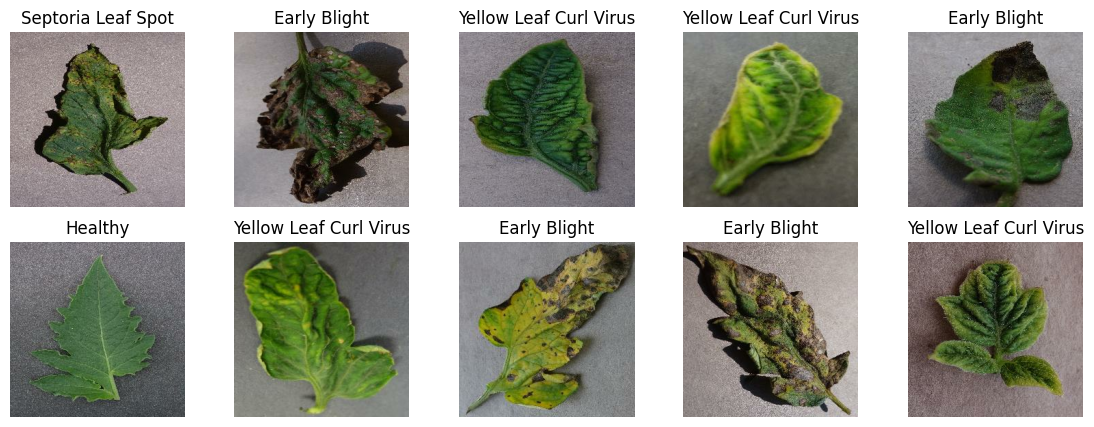



>>> Sample Images of "Apple" dataset


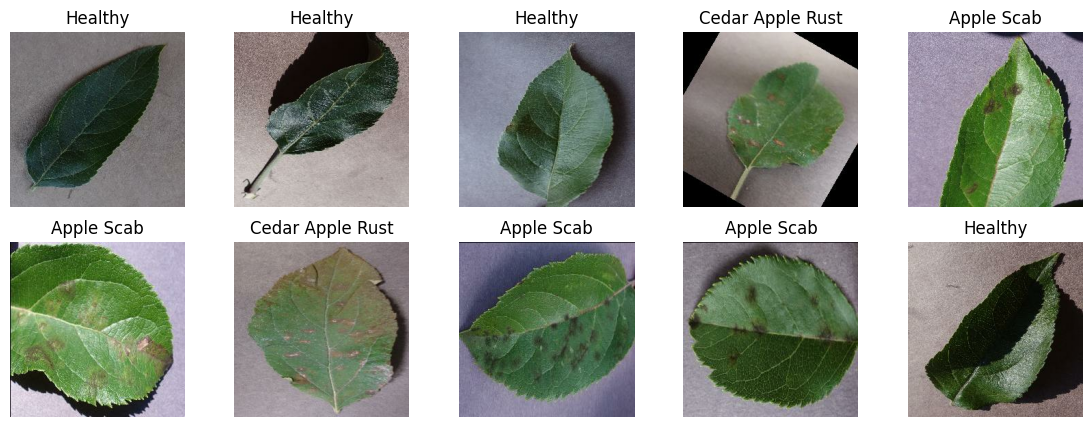



>>> Sample Images of "Bell Pepper" dataset


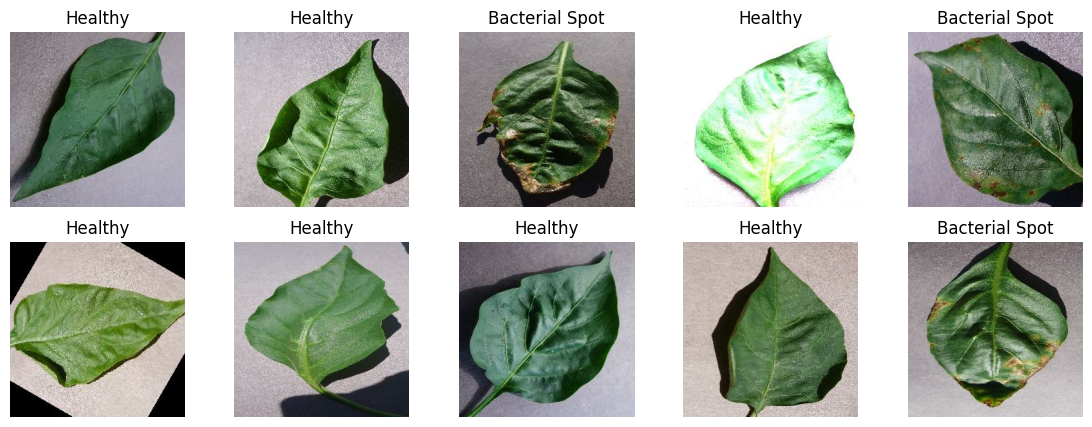



>>> Sample Images of "Strawberry" dataset


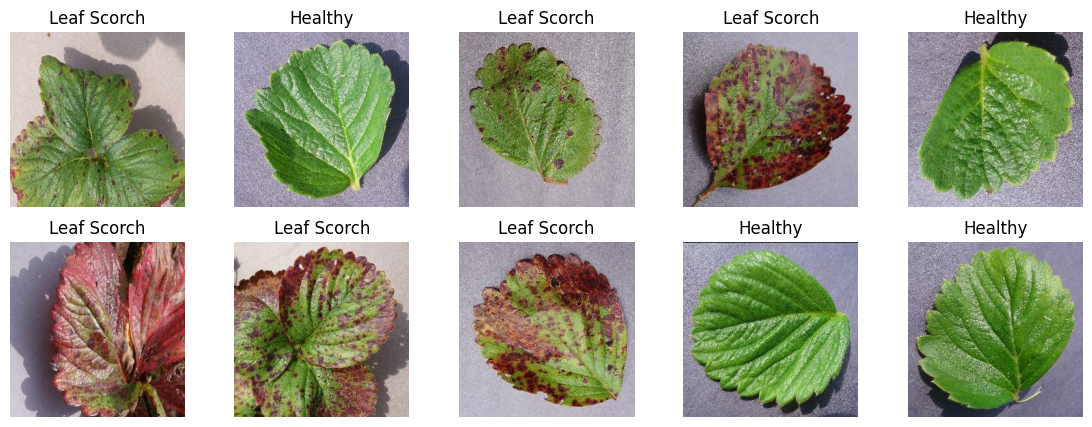



>>> Sample Images of "Corn (Maize)" dataset


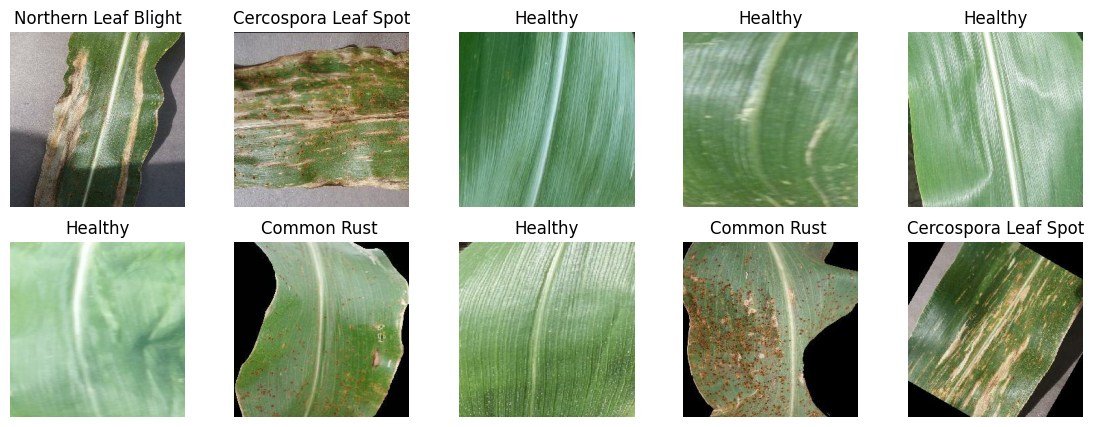



>>> Sample Images of "Peach" dataset


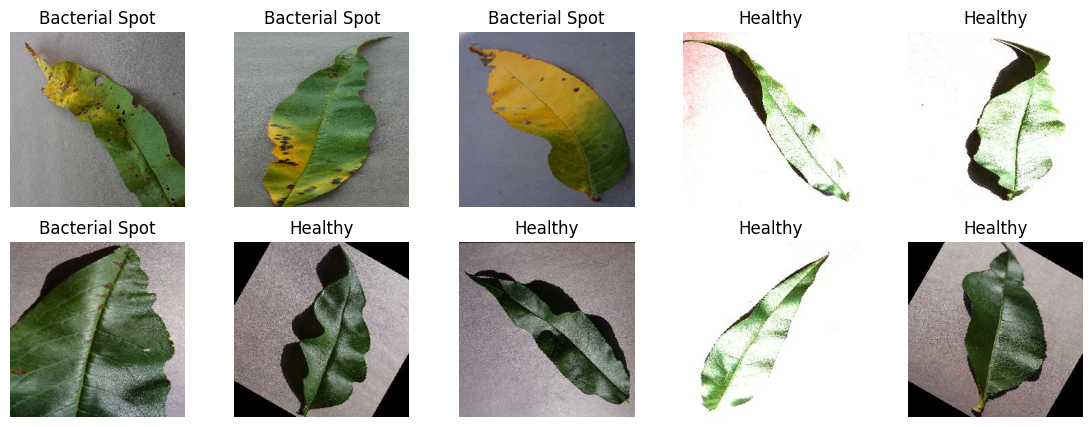



>>> Sample Images of "Grape" dataset


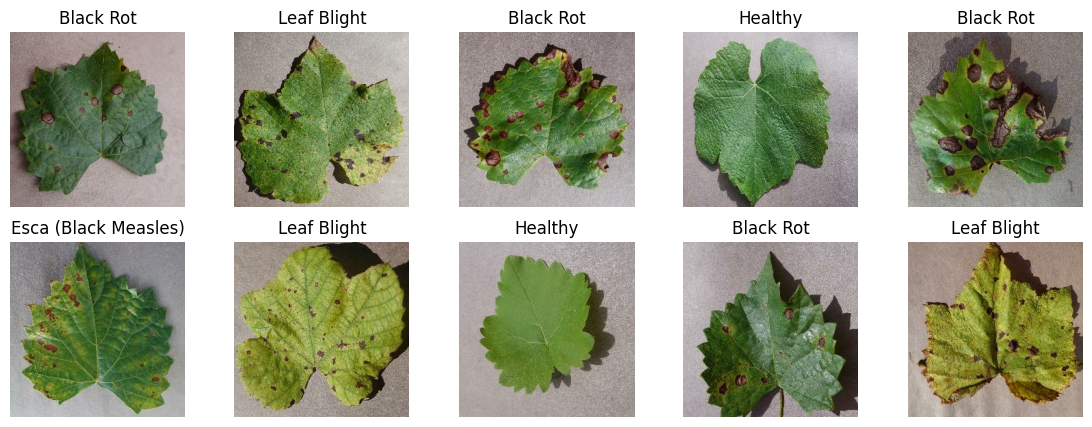



>>> Sample Images of "Cherry" dataset


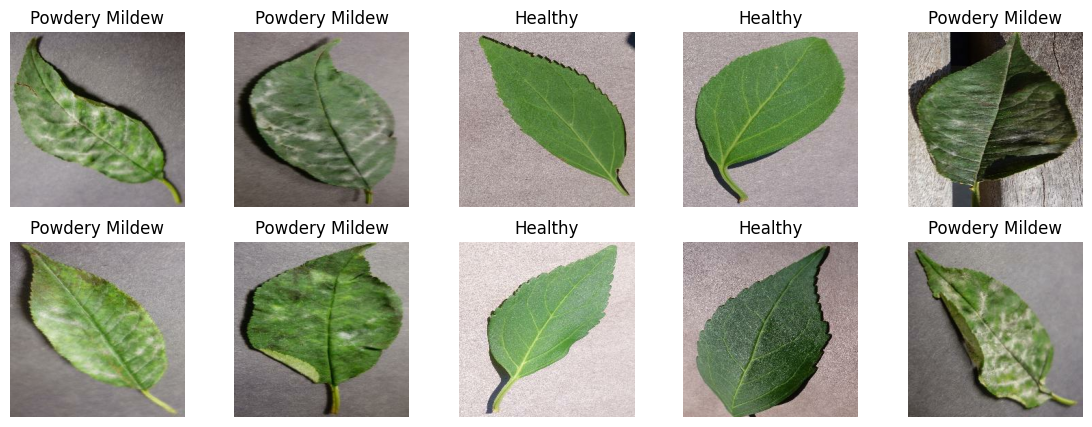



>>> Sample Images of "Potato" dataset


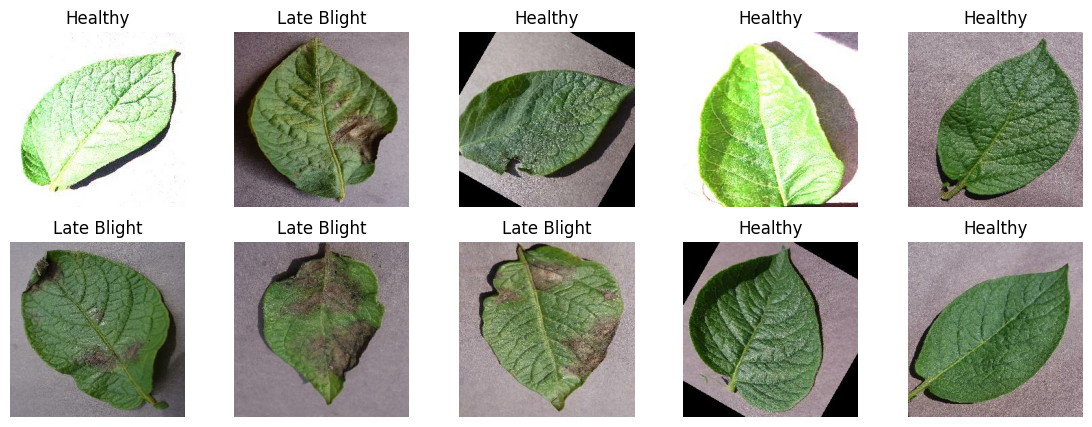

In [10]:
for plant in plant_dirs:
    print('>>> Sample Images of "{}" dataset'.format(plant))
    plt.figure(figsize = (14,5))
    for image_batch, image_label in train_dataset[plant].take(1):
        for i in range(10):
            plt.subplot(2,5,i+1)
            plt.imshow(image_batch[i].numpy().astype('uint8'))
            plt.title(classes[plant][image_label[i]])
            plt.axis('off')
        plt.show()    
    print('\n')

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Base directory for the dataset
base_dir = '/kaggle/input/plant-village-dataset-updated'

In [12]:
# Directories for training, validation, and testing
train_dir = os.path.join(base_dir, 'Train')
val_dir = os.path.join(base_dir, 'Val')
test_dir = os.path.join(base_dir, 'Test')

In [13]:
# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [15]:
# Function to create data generators for each category
def create_data_generators(base_dir, img_size=(150, 150), batch_size=32):

    categories = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]

    train_generators = {}
    val_generators = {}
    test_generators = {}

    for category in categories:
        train_dir = os.path.join(base_dir, category, 'Train')
        val_dir = os.path.join(base_dir, category, 'Val')
        test_dir = os.path.join(base_dir, category, 'Test')
        
        print(category)
        if os.path.exists(train_dir) and os.path.exists(val_dir) and os.path.exists(test_dir):
            
            print('Training Dataset')
            train_generators[category] = train_datagen.flow_from_directory(
                train_dir,
                target_size=img_size,
                batch_size=batch_size,
                class_mode='categorical'
            )
            
            print('Validation Dataset')
            val_generators[category] = val_test_datagen.flow_from_directory(
                val_dir,
                target_size=img_size,
                batch_size=batch_size,
                class_mode='categorical'
            )
            
            print('Testing Dataset')
            test_generators[category] = val_test_datagen.flow_from_directory(
                test_dir,
                target_size=img_size,
                batch_size=batch_size,
                class_mode='categorical',
                shuffle=False  # Important for evaluation
            )
        else:
            print(f"Warning: One or more directories for {category} do not exist. Skipping this category.")
    
    return train_generators, val_generators, test_generators

In [16]:
# Create data generators for each category
train_generators, val_generators, test_generators = create_data_generators(base_dir)

Tomato
Training Dataset
Found 11108 images belonging to 6 classes.
Validation Dataset
Found 2495 images belonging to 6 classes.
Testing Dataset
Found 280 images belonging to 6 classes.
Apple
Training Dataset
Found 7771 images belonging to 4 classes.
Validation Dataset
Found 1747 images belonging to 4 classes.
Testing Dataset
Found 196 images belonging to 4 classes.
Bell Pepper
Training Dataset
Found 3901 images belonging to 2 classes.
Validation Dataset
Found 877 images belonging to 2 classes.
Testing Dataset
Found 98 images belonging to 2 classes.
Strawberry
Training Dataset
Found 3598 images belonging to 2 classes.
Validation Dataset
Found 809 images belonging to 2 classes.
Testing Dataset
Found 91 images belonging to 2 classes.
Corn (Maize)
Training Dataset
Found 7316 images belonging to 4 classes.
Validation Dataset
Found 1645 images belonging to 4 classes.
Testing Dataset
Found 188 images belonging to 4 classes.
Peach
Training Dataset
Found 3566 images belonging to 2 classes.
Vali

In [17]:
# Define class labels for each category
class_labels = {
    'Tomato': ['Bacterial Spot', 'Early Blight', 'Healthy', 'Late Blight', 'Septoria Leaf Spot', 'Yellow Leaf Curl Virus'],
    'Apple': ['Apple Scab', 'Black Rot', 'Cedar Apple Rust', 'Healthy'],
    'Bell Pepper': ['Bacterial Spot', 'Healthy'],
    'Strawberry': ['Healthy', 'Leaf Scorch'],
    'Corn (Maize)': ['Cercospora Leaf Spot', 'Common Rust', 'Healthy', 'Northern Leaf Blight'],
    'Peach': ['Bacterial Spot', 'Healthy'],
    'Grape': ['Black Rot', 'Esca (Black Measles)', 'Healthy', 'Leaf Blight'],
    'Cherry': ['Healthy', 'Powdery Mildew'],
    'Potato': ['Early Blight', 'Healthy', 'Late Blight']
}

In [18]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
category = 'Strawberry'
print(f"Training model for category: {category}")

train_generator = train_generators[category]
val_generator = val_generators[category]

history = model.fit(train_generator,
                    batch_size=16,
                    epochs=15,
                    validation_data=val_generator,
                    validation_batch_size=16
                    )

Training model for category: Strawberry
Epoch 1/15


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-08-04 11:08:59.244623: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 7.01362, expected 6.05938
2024-08-04 11:08:59.244686: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 6.59738, expected 5.64314
2024-08-04 11:08:59.244695: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 7.60386, expected 6.64961
2024-08-04 11:08:59.244703: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 7.47181, expected 6.51757
2024-08-04 11:08:59.244711: E external/local_xla/xla/service/gpu/buffer_comparator.cc:11

  1/113 ━━━━━━━━━━━━━━━━━━━━ 13:45 7s/step - accuracy: 0.5000 - loss: 0.6972

I0000 00:00:1722769742.097345      75 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


 85/113 ━━━━━━━━━━━━━━━━━━━━ 7s 269ms/step - accuracy: 0.7208 - loss: 1.0975

2024-08-04 11:09:25.313431: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 21904: 5.56409, expected 4.76277
2024-08-04 11:09:25.313491: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 21905: 6.73734, expected 5.93602
2024-08-04 11:09:25.313505: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 21906: 5.42182, expected 4.6205
2024-08-04 11:09:25.313518: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 21907: 6.36519, expected 5.56387
2024-08-04 11:09:25.313531: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 21910: 6.88636, expected 6.08504
2024-08-04 11:09:25.313543: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 21911: 6.63824, expected 5.83692
2024-08-04 11:09:25.313554: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 21912: 5.05235, expected 4.25103
2024-08-04 11:09:25.313566: 

111/113 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - accuracy: 0.7511 - loss: 0.9510

2024-08-04 11:09:36.153509: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 7.22819, expected 6.32685
2024-08-04 11:09:36.153584: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 7.17836, expected 6.27701
2024-08-04 11:09:36.153599: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 6.73453, expected 5.83318
2024-08-04 11:09:36.153612: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 7.61615, expected 6.7148
2024-08-04 11:09:36.153624: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 7.94157, expected 7.04022
2024-08-04 11:09:36.153636: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 7.75397, expected 6.85263
2024-08-04 11:09:36.153648: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 7.87063, expected 6.96928
2024-08-04 11:09:36.153661: E external/local_xla/xla/ser

113/113 ━━━━━━━━━━━━━━━━━━━━ 42s 309ms/step - accuracy: 0.7539 - loss: 0.9374 - val_accuracy: 0.8405 - val_loss: 0.7088
Epoch 2/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 23s 188ms/step - accuracy: 0.9508 - loss: 0.1195 - val_accuracy: 0.9258 - val_loss: 0.1703
Epoch 3/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 23s 196ms/step - accuracy: 0.9604 - loss: 0.0969 - val_accuracy: 0.9122 - val_loss: 0.3316
Epoch 4/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 41s 193ms/step - accuracy: 0.9655 - loss: 0.0819 - val_accuracy: 0.9543 - val_loss: 0.2369
Epoch 5/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 41s 196ms/step - accuracy: 0.9618 - loss: 0.0989 - val_accuracy: 0.9197 - val_loss: 0.3316
Epoch 6/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 23s 191ms/step - accuracy: 0.9591 - loss: 0.0958 - val_accuracy: 0.9691 - val_loss: 0.0984
Epoch 7/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 24s 199ms/step - accuracy: 0.9761 - loss: 0.0594 - val_accuracy: 0.8949 - val_loss: 0.2511
Epoch 8/15
113/113 ━━━━━━━━━━━━━━━━━━━━ 23s 194ms/step - accuracy: 0.9723 - loss: 0.0758 - val

In [21]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def preprocess_image(image_path, target_size=(150, 150)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

In [22]:
img_array = preprocess_image('/kaggle/input/plant-village-dataset-updated/Strawberry/Test/Leaf Scorch/05063afb-0737-43d3-ae23-9bb42743bf7f___RS_L.Scorch 1097_flipLR.JPG')  
predictions = model.predict(img_array)
print(predictions)
predicted_class = np.argmax(predictions, axis=1)[0]
class_label = class_labels[category][predicted_class]
class_label

2024-08-04 11:15:57.908510: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 30560: 4.13759, expected 3.62039
2024-08-04 11:15:57.908581: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 30689: 4.16181, expected 3.6446
2024-08-04 11:15:57.908631: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 40495: 4.13759, expected 3.62039
2024-08-04 11:15:57.908639: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 40624: 4.16181, expected 3.6446
2024-08-04 11:15:57.908664: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 44990: 4.55328, expected 3.99621
2024-08-04 11:15:57.908680: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 47010: 4.40387, expected 3.8468
2024-08-04 11:15:57.908687: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 47030: 4.30735, expected 3.75029
2024-08-04 11:15:57.908697: E 

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step
[[4.583786e-16 1.000000e+00]]


'Leaf Scorch'

In [23]:
model.save('Strawberry_model.keras')